# Derivation of coordinate descent for Lasso regression

This posts describes how the soft thresholding operator provides the solution to the Lasso regression problem when using coordinate descent algorithms. The derivation is taken from my post on [stackexchange][1]

[1]: https://stats.stackexchange.com/questions/123672/coordinate-descent-soft-thresholding-update-operator-for-lasso/351134#351134

### Libraries


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model

%matplotlib inline
plt.style.use('ggplot')

# Derivation 

Here is an alternative derivation which I find quite intuitive using summations rather than matrix notation. Notation is similar to Stanford CS229 notation with $m$ observations, $n$ features, superscript $(i)$ for the $i$'th observation, subscript $j$ for the $j$'th feature.

### Lasso cost function

\begin{aligned}
 RSS^{lasso}(\theta) & = RSS^{OLS}(\theta) + \lambda || \theta ||_1
\\
&= \frac{1}{2} \sum_{i=1}^m \left[y^{(i)} - \sum_{j=0}^n \theta_j  x_j^{(i)}\right]^2 + \lambda \sum_{j=0}^n |\theta_j|
\end{aligned}

### Focus on the OLS term

\begin{aligned}
	 \frac{\partial }{\partial \theta_j} RSS^{OLS}(\theta) & = -  \sum_{i=1}^m x_j^{(i)}  \left[y^{(i)} - \sum_{j=0}^n \theta_j x_j^{(i)}\right]
	 \\
	 & = -  \sum_{i=1}^m x_j^{(i)}  \left[y^{(i)} - \sum_{k \neq j}^n \theta_k x_k^{(i)} - \theta_j x_j^{(i)}\right]
	 \\
	 & = -  \sum_{i=1}^m x_j^{(i)} \left[y^{(i)} - \sum_{k \neq j}^n \theta_k x_k^{(i)} \right] +  \theta_j \sum_{i=1}^m (x_j^{(i)})^2
\\
& \triangleq - \rho_j + \theta_j z_j
\end{aligned}

where we define $\rho_j$ and the normalizing constant $z_j$ for notational simplicity

### Focus on the $L_1$ term
The problem with this term is that the derivative of the absolute function is undefined at $\theta = 0$. The method of coordinate descent makes use of two techniques which are to 

- Perform coordinate-wise optimization, which means that at each step only one feature is considered and all others are **treated as constants**
- Make use of **subderivatives and subdifferentials** which are extensions of the notions of derivative for non differentiable functions.


The combination of these two points is important because in general, the subdifferential approach to the Lasso regression does not have a closed form solution in the multivariate case. Except for the special case of orthogonal features which is discussed [here][1]. 

As we did previously for the OLS term, the coordinate descent allows us to isolate the $\theta_j$: 

$$ \lambda \sum_{j=0}^n |\theta_j| = \lambda |\theta_j| + \lambda \sum_{k\neq j}^n |\theta_k|$$

And optimizing this equation as a function of $\theta_j$ reduces it to a univariate problem. 

Using the [definition of the subdifferential][2] as a non empty, closed interval $[a,b]$ where $a$ and $b$ are the one sided limits of the derivative we get the following equation for the subdifferential $\partial_{theta_j} \lambda |\theta|_1$

\begin{equation}
    \partial_{\theta_j} \lambda \sum_{j=0}^n |\theta_j|  =      \partial_{\theta_j} \lambda |\theta_j|=
    \begin{cases}
      \{ - \lambda \} & \text{if}\ \theta_j < 0 \\
      [ - \lambda , \lambda ] & \text{if}\ \theta_j = 0 \\
      \{  \lambda \} & \text{if}\ \theta_j > 0 
    \end{cases}
  \end{equation} 

### Putting it together

Returning to the complete Lasso cost function which is convex and non differentiable (as both the OLS and the absolute function are convex) 
 
$$ RSS^{lasso}(\theta) = RSS^{OLS}(\theta) + \lambda || \theta ||_1 \triangleq f(\theta) + g(\theta)$$

We now make use of three important properties of **subdifferential theory** (see wikipedia)

- A convex function is differentiable at a point $x_0$ is and only if the subdifferential set is made up of only one point, which is the derivative at $x_0$
	
- **Moreau-Rockafellar theorem:** If $f$ and $g$ are both convex functions with subdifferentials $\partial f$ and $\partial g$ then the subdifferential of $f + g$ is $\partial(f + g) = \partial f + \partial g$. 

- **Stationary condition**: A point $x_0$ is the **global minimum** of a convex function $f$ if and only if the **zero** is contained in the subdifferential


Computing the subdifferential of the Lasso cost function and equating to zero to find the mnimum: 

\begin{aligned}
	\partial_{\theta_j} RSS^{lasso}(\theta)  &= 	\partial_{\theta_j} RSS^{OLS}(\theta) + \partial_{\theta_j} \lambda || \theta ||_1 
	\\
	0 & = -\rho_j + \theta_j z_j + \partial_{\theta_j} \lambda || \theta_j || 
	\\
	0 & =     \begin{cases}
       -\rho_j + \theta_j z_j  - \lambda & \text{if}\ \theta_j < 0 \\
        [-\rho_j  - \lambda ,-\rho_j + \lambda ] & \text{if}\ \theta_j = 0 \\
       -\rho_j + \theta_j z_j +  \lambda  & \text{if}\ \theta_j > 0 
    \end{cases}
\end{aligned}


 For the second case we must ensure that the closed interval contains the zero so that $\theta_j = 0$ is a global minimum  
 
$$ 0 \in [-\rho_j  - \lambda ,-\rho_j + \lambda ] $$

$$     -\rho_j  - \lambda \leq 0 $$

$$     -\rho_j  +\lambda \geq 0 $$

$$     - \lambda \leq \rho_j \leq \lambda$$


Solving for $\theta_j$ for the first and third case and combining with above: 


\begin{aligned}
     \begin{cases}
       \theta_j = \frac{\rho_j + \lambda}{z_j}  & \text{for} \ \rho_j < - \lambda \\
       \theta_j = 0 & \text{for} \ - \lambda \leq \rho_j \leq \lambda \\
       \theta_j = \frac{\rho_j - \lambda}{z_j}  & \text{for} \ \rho_j > \lambda 
    \end{cases}
\end{aligned}

We recognize this as the *soft thresholding* function $\frac{1}{z_j} S(\rho_j , \lambda)$ where $\frac{1}{z_j}$ is a normalizing constant which is equal to $1$ when the data is normalized. 

### Coordinate descent update rule:
Repeat until convergence or max number of iterations:

 - For $j = 0,1,...,n$
 - Compute $\rho_j = \sum_{i=1}^m x_j^{(i)}  (y^{(i)}  - \sum_{k \neq j}^n \theta_k x_k^{(i)} ]$
 - Compute $z_j = \sum_{i=1}^m (x_j^{(i)})^2$
 - Set $\theta_j = \frac{1}{z_j} S(\rho_j, \lambda)$

### Soft threshold function
[![Soft threshold vs OLS][3]][3]

### Sources:

- [A fantastic blog post][4]
- [Coursera ML course][5]
- [Lecture notes][6]

  [1]: https://stats.stackexchange.com/questions/17781/derivation-of-closed-form-lasso-solution
  [2]: https://en.wikipedia.org/wiki/Subderivative
  [3]: https://i.stack.imgur.com/sO1VW.png
  [4]: http://jocelynchi.com/soft-thresholding-operator-and-the-lasso-solution
  [5]: https://www.coursera.org/learn/ml-regression/lecture/6OLyn/deriving-the-lasso-coordinate-descent-update
  [6]: https://www.cs.cmu.edu/~ggordon/10725-F12/slides/25-coord-desc.pdf

# Some background and intuition on subdifferentials
As the previous derivation requires knowledge of subdifferential theory, the next section summarizes notes and intuition on the topic. 


## Taylor approximation as a global underestimator

Before describing what subgradients are, recall that the first order Taylor approximation of a differentiable, convex function is always a **global underestimator** of that function. So given a differentiable, convex function $f : S \rightarrow \mathbb{R}$ over a convex set $S \subseteq \mathbb{R} $ we have 

$$ f(b) \geq f(a) + f'(a)(b - a) \ \ , \forall a, b \in S $$

The figure below illustrates this for $f(x) =x^2$. The blue lines depict the first order approximations to $f(y)$ at $x$, which are all under the curve

[1]: http://jocelynchi.com/soft-thresholding-operator-and-the-lasso-solution

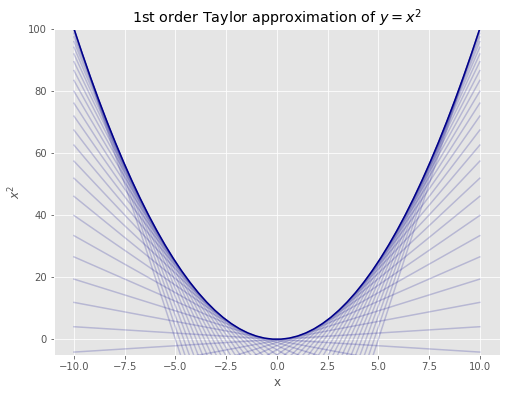

In [4]:
#Lines below the x^2 function
x1 = np.linspace(-10,10,50)
y1 = x1**2
slopes1 = 2*x1
intercepts1 = y1 - slopes1 * x1
lines1 = [slopes1[i] * x1 + intercepts1[i] for i in range(len(x1))]

#Plotting the lines
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1,y1, color = 'darkblue')
[ax.plot(x1, lines1[i], color = 'darkblue', alpha = .2) for i in range(len(x1))]
ax.set_ylim(-5,100)
ax.set_xlabel('x')
ax.set_ylabel('$x^2$')
plt.title('1st order Taylor approximation of $y = x^2$')
plt.show()

For functions such as $f(x) = |x|$ for which the derivative is undefined at some points of the domain, we can still use this idea by introducing the concept of **subdifferential**. 

## Subdifferential: definition
The subdifferential $\partial f$ of a convex function $f$ is given by

$$ \partial f(x) = \{ g : f(b) \geq f(a) + g(b - a) \ \forall b \in S  \}$$

Where every $g \in \partial f$ is called a subgradient of $f$. The following figure shows the subdifferential for $f = |x|$ where the green lines are the subgradients of $g(x)$ at $x = 0$


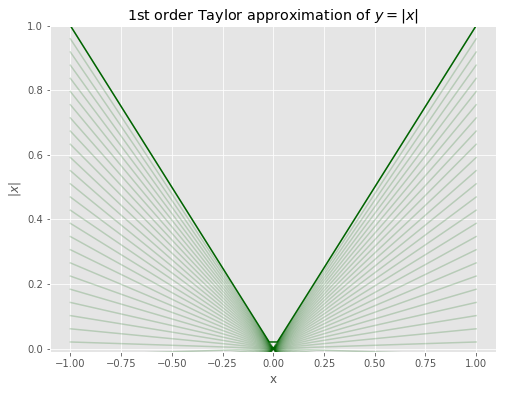

In [5]:
#Lines below the |x| function
x2 = np.linspace(-1,1,50)
y2 = np.abs(x2)
slopes2 = x2
lines2 = [slopes2[i] * x2  for i in range(len(x2))]

#Plot
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x2,y2, color = 'darkgreen')
[ax.plot(x2, lines2[i], color = 'darkgreen', alpha = .2) for i in range(len(x2))]
ax.set_ylim(-.01,1)
ax.set_xlabel('x')
ax.set_ylabel('$|x|$')
plt.title('1st order Taylor approximation of $y = |x|$')
plt.show()


In other words, one can draw a line which goes through the point $(x_0, f(x_0))$ and which is everywhere either touching or below the graph of $f$. 

- **Subderivative:** the slope of such a line is called a subderivative (because the line is under the graph of $f$) 
- **Subdifferential** the set of all subderivatives at $x_0$ is called the subdifferential. 


The subdifferential is a non empty, closed interval $[a,b]$ where a and b are the one sided limits: 

$$a=\lim _{{x\to x_{0}^{-}}}{\frac  {f(x)-f(x_{0})}{x-x_{0}}}$$

$$b=\lim _{{x\to x_{0}^{+}}}{\frac  {f(x)-f(x_{0})}{x-x_{0}}}$$


## Properties


- A convex function is differentiable at a point $x_0$ is and only if the subdifferential is made up of only one point, which is the derivative at $x_0$
- A point $x_0$ is the \textbf{global minimum} of a convex function $f$ if and only if the \textbf{zero} is contained in the subdifferential. Intuitively, this means we can draw a horizontal \qq{subtangent line} below the graph of $f$ at the point $x_0$. 
- If $f$ and $g$ are both convex functions with subdifferentials $\partial f$ and $\partial g$ then the subdifferential of $f + g$ is $\partial(f + g) = \partial f + \partial g$

## Example: $f(x) = |x|$

- The function $f(x) = |x|$ is convex but non differentiable at $x = 0$.  
- Its subdifferential at the origin is the interval $[-1,1]$ since the one sided limits of the derivative are -1, and 1 respectively. 
- Since the subdifferential contains the origin, the point $x = 0$ is the global minimum
- For $x < 0$ the subdifferential contains a single point: $-1$ and for $x>0$ a single point $1$ which means the function is differential everywhere else

# Soft thresholding function
$ S(\rho_j, \lambda)$

In [8]:
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return rho + lamda
    elif rho > lamda:
        return rho - lamda
    else: 
        return 0
lamda = 3    
y_st = [soft_threshold(xii,lamda) for xii in x1]

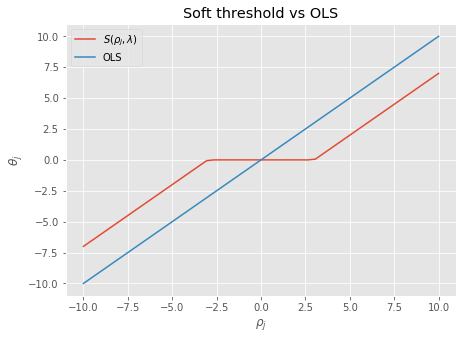

In [9]:
plt.figure(figsize = (7,5))
plt.plot(x1, y_st, label = '$S(\\rho_j, \\lambda)$')
plt.plot(x1, x1, label = 'OLS')
plt.xlabel('$\\rho_j$')
plt.ylabel('$\\theta_j$')
plt.legend()
plt.title('Soft threshold vs OLS')
plt.show()